<a href="https://colab.research.google.com/github/Dichand/Projects/blob/main/1_Water_Quality_prediction_(project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
#Importing water potability csv file to predict water quality from it

df= pd.read_csv("/water_potability.csv")

In [ ]:
#1st 5 row of the dataframe.
df.head() 

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
#Number of rows and columns respectively of the dataframe.
df.shape

(3276, 10)

# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#detecting missing values.
df.isna()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [ ]:
#all the columns of the dataframe
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
#find the sum of all the missing values in the respective columns

df.isna().sum() 

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
#Percentage of missing values in the columns

df.isnull().sum()/ len(df) * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Missing value handling

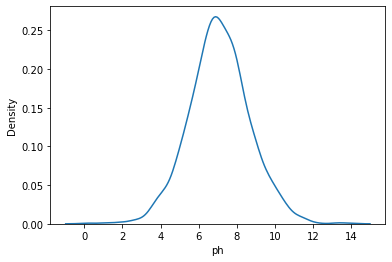

In [ ]:
sns.kdeplot(df.ph)

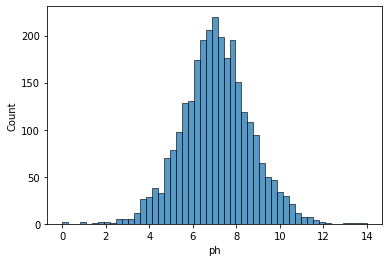

In [ ]:
sns.histplot(df.ph)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


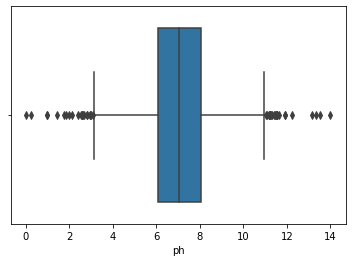

In [ ]:
sns.boxplot(df.ph)

In [ ]:
df.ph

0            NaN
1       3.716080
2       8.099124
3       8.316766
4       9.092223
          ...   
3271    4.668102
3272    7.808856
3273    9.419510
3274    5.126763
3275    7.874671
Name: ph, Length: 3276, dtype: float64

In [ ]:
#replcing null values with the medians
df.fillna(df.median(), inplace = True)

In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Hence the data is cleaned.

In [ ]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

out of 3276 rows of water quality sample, 1998 samples are of bad quality and 1278 samples are of good quality.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


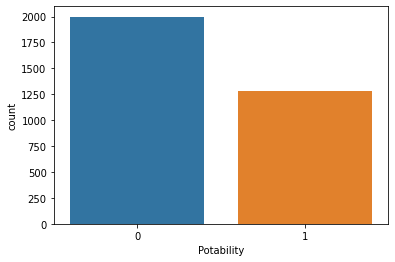

In [ ]:
sns.countplot(df['Potability'])
plt.show()

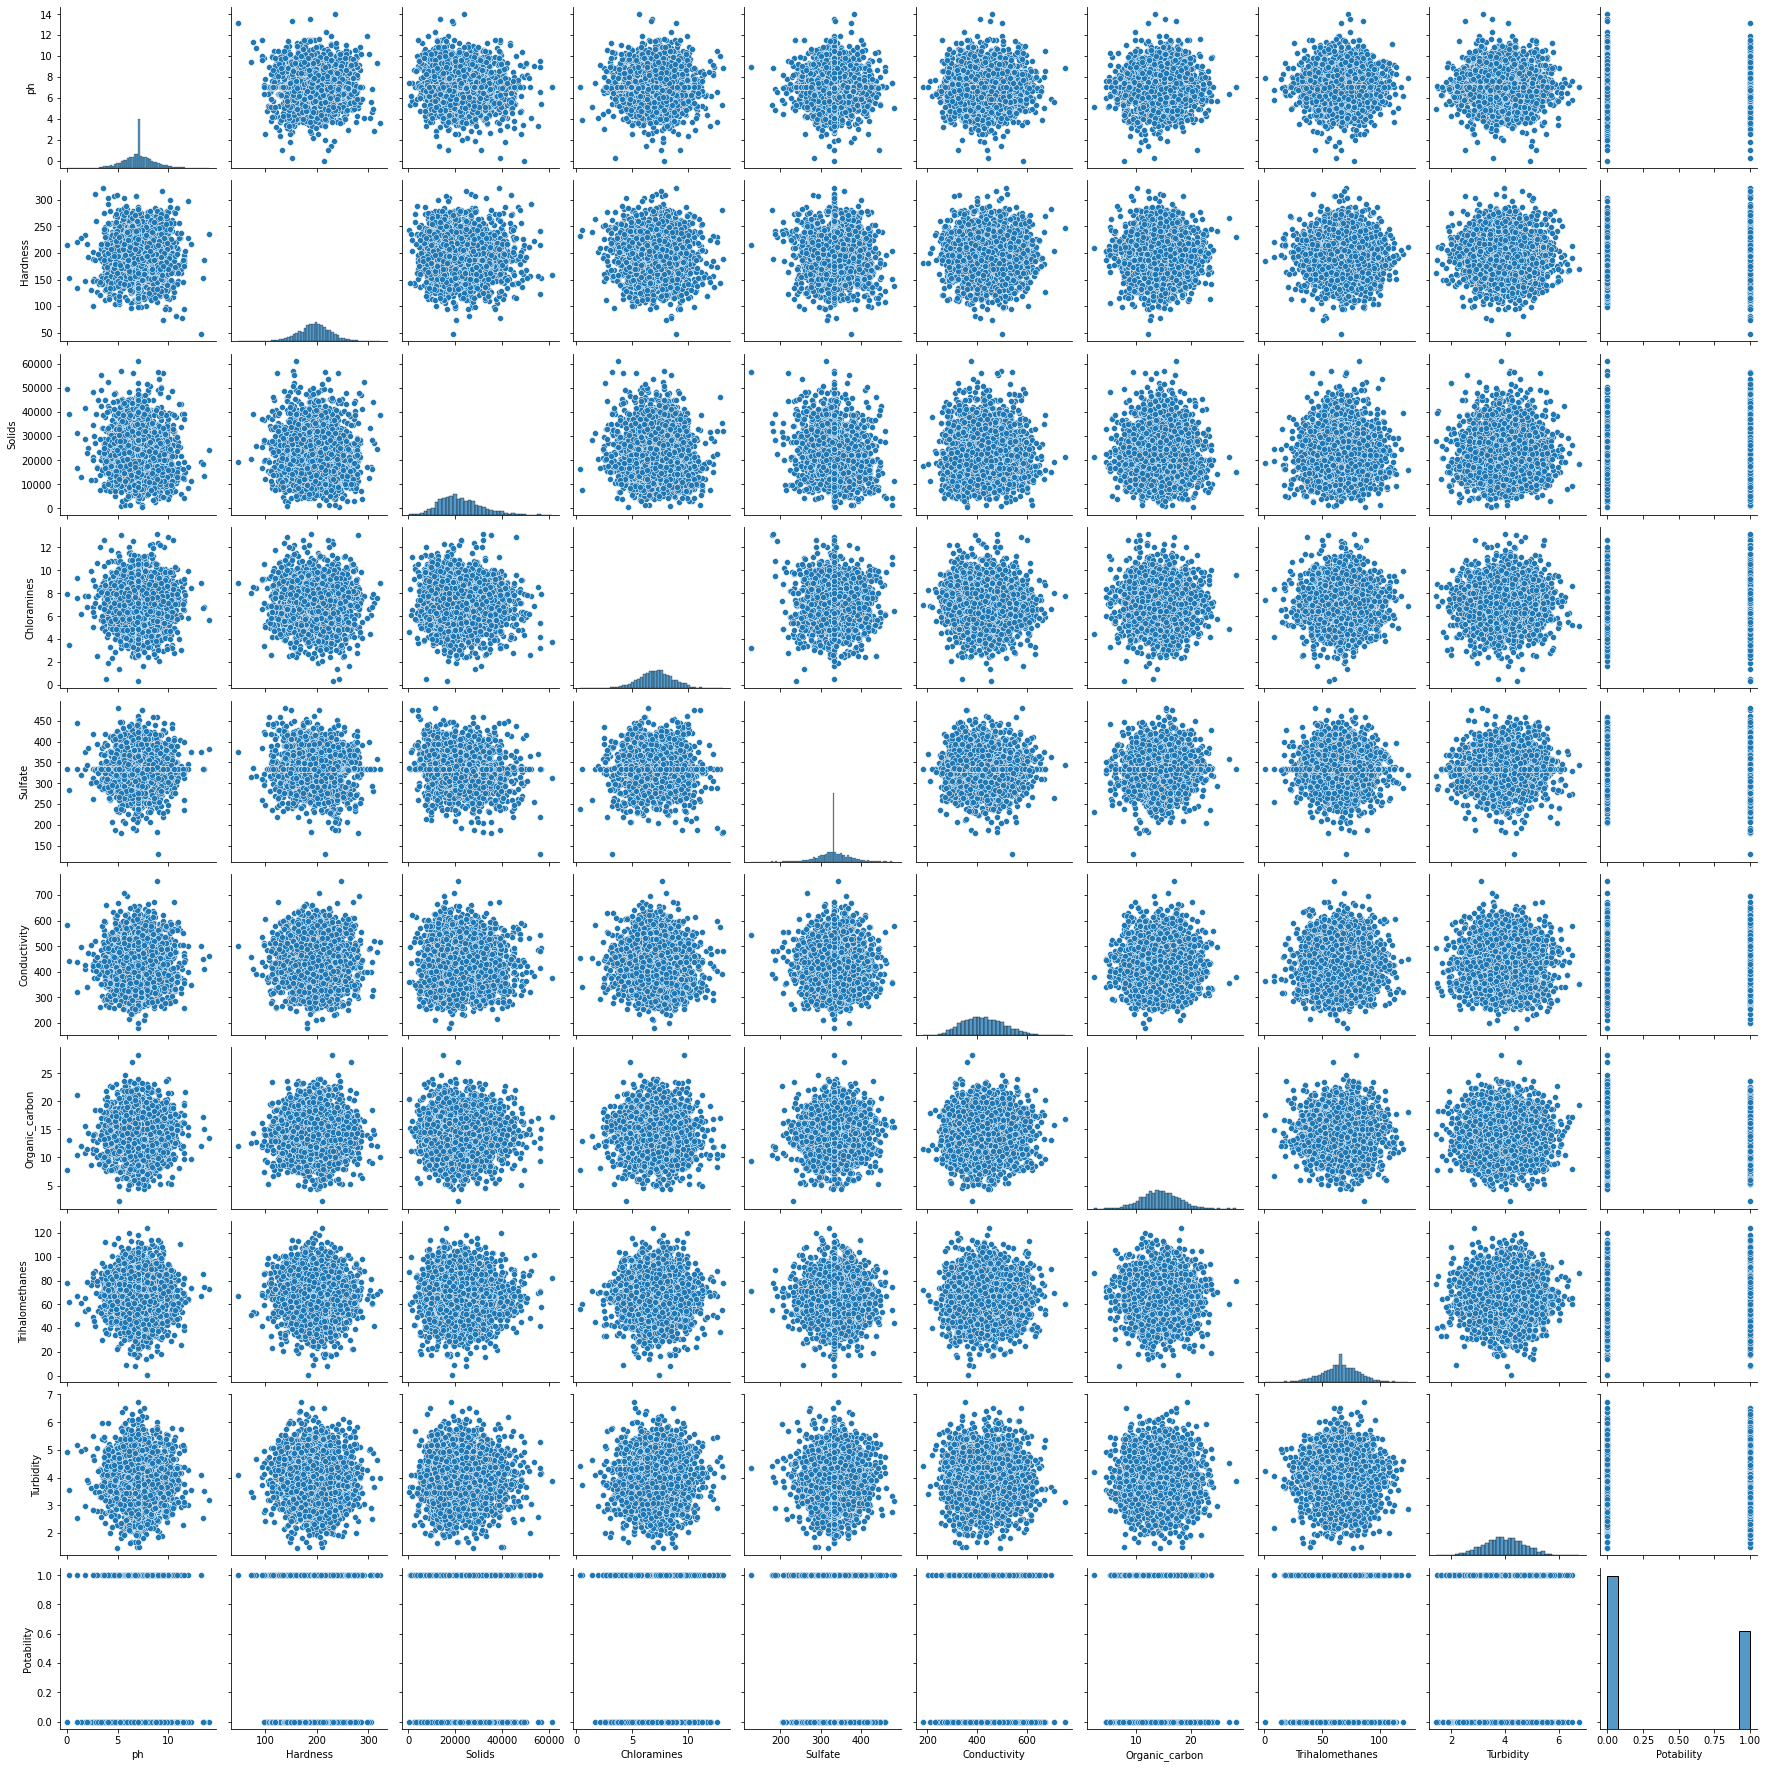

In [ ]:
 sns.pairplot(df)

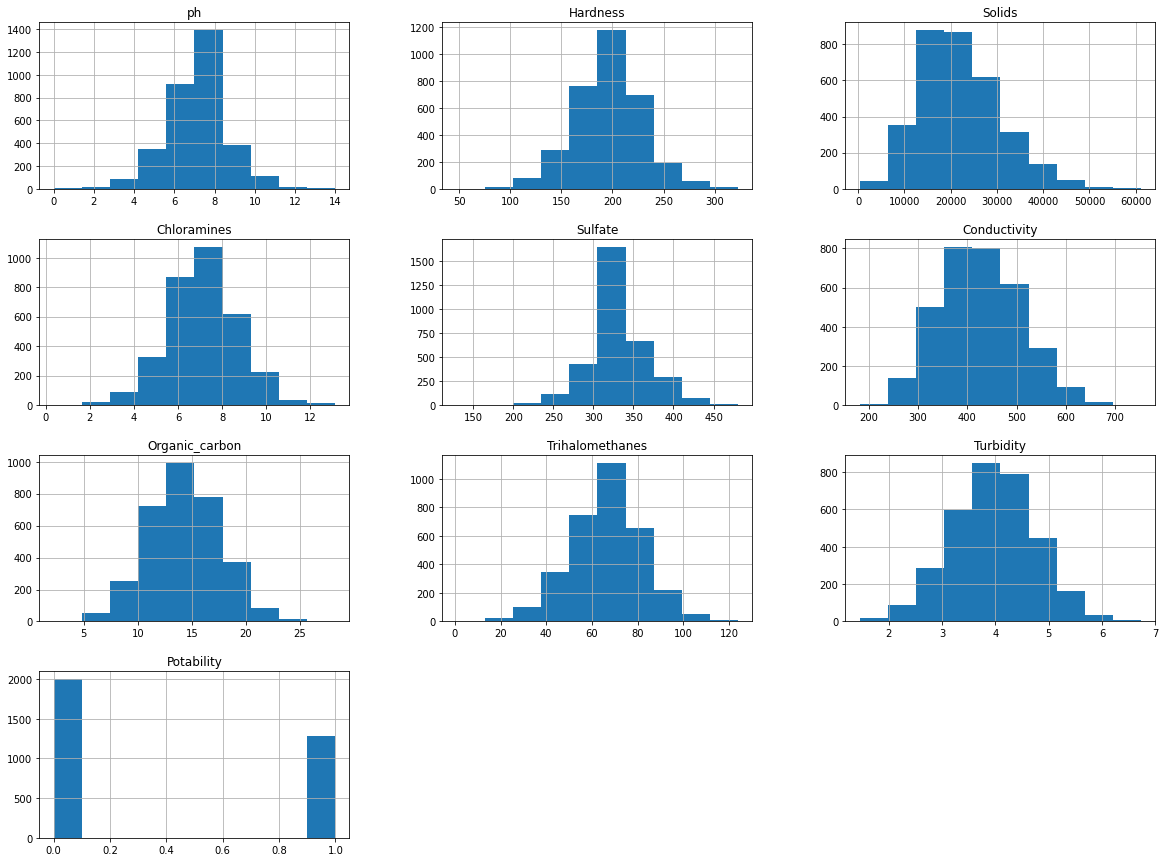

In [ ]:
df.hist(figsize= (20 ,15))

plt.show()

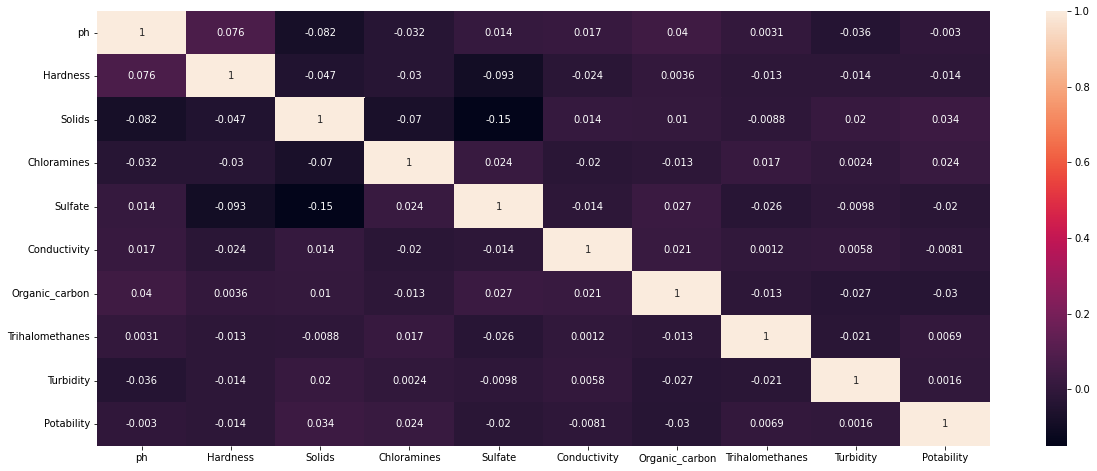

In [ ]:
#checking the corelation between the features inorder to check if the dimensions can be reduced or not.

plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), annot = True , color = 'r')
plt.show()

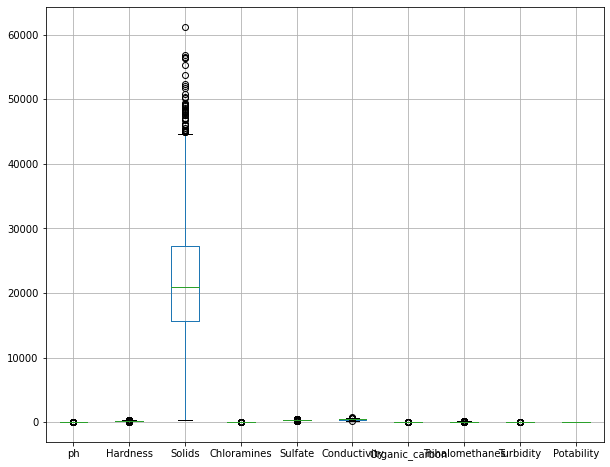

In [ ]:
#Checking outlier 
df.boxplot(figsize= (10,8))

the above boxplot shows outlier in solid feature but we cant remove outlier . Removing it will show water is safe to drink ech and everytime as impurites is present in outliers.

# patitioning the data

In [ ]:
x = df.drop('Potability', axis = 1) 
y = df.Potability

#Train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)

In [ ]:
x_train.shape, y_train.shape

((2620, 9), (2620,))

In [ ]:
x_test.shape, y_test.shape

((656, 9), (656,))

#CREATING A MODEL

#1) Desicion tree

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[265, 130],
       [118, 143]])

In [ ]:
precision_score(y_test, y_pred)

0.5238095238095238

In [ ]:
recall_score(y_test, y_pred)

0.5478927203065134

In [ ]:
accuracy_score(y_test, y_pred)

0.6219512195121951

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       395
           1       0.52      0.55      0.54       261

    accuracy                           0.62       656
   macro avg       0.61      0.61      0.61       656
weighted avg       0.63      0.62      0.62       656



# 2)Random forest

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [ ]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       395
           1       0.67      0.31      0.43       261

    accuracy                           0.67       656
   macro avg       0.67      0.61      0.60       656
weighted avg       0.67      0.67      0.63       656



#3)logisticRegression

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       395
           1       0.00      0.00      0.00       261

    accuracy                           0.60       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.36      0.60      0.45       656



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyper parameter tuning

In [ ]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth' : [2,3,4,6],
    'max_features': ['sqrt', 'log2'],
    'random_state': [10, 20, 30, 40]
}

In [ ]:
model = DecisionTreeClassifier()
cv = GridSearchCV(model, param_grid= param_grid, cv=5)

In [ ]:
cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 6],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [10, 20, 30, 40]})

In [ ]:
best_model= cv.best_estimator_

In [ ]:
best_model.fit(x_train, y_train)
y_pred =best_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.90      0.73       395
           1       0.49      0.14      0.21       261

    accuracy                           0.60       656
   macro avg       0.55      0.52      0.47       656
weighted avg       0.56      0.60      0.53       656



# Prediciting quality of water

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
best_model.predict([[3.345,101.345,20453.45673,7.345,345.535,676.234, 11.234424,90.2345,4.345234 ]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

it return 0 which means the water quality with given data is bad.